#1. KHỞI TẠO MÔI TRƯỜNG

In [ ]:
#https://drive.google.com/file/d/113Y-jwWvkUHShZg8azynF94k8OpC0ZQ0/view?usp=sharing
!gdown --id 113Y-jwWvkUHShZg8azynF94k8OpC0ZQ0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=113Y-jwWvkUHShZg8azynF94k8OpC0ZQ0
To: /content/weatherAUS_cleaned.csv
100% 16.0M/16.0M [00:00<00:00, 54.2MB/s]


In [ ]:
!pip install prettytable

In [ ]:
# Thư viện cần sử dụng
import pandas as pd
import numpy as np
import statistics

import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/weatherAUS_cleaned.csv')
df = data.copy()
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,is_RainToday,is_RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,7.624853,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,7.624853,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,7.624853,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131941 entries, 0 to 131940
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             131941 non-null  object 
 1   Location         131941 non-null  object 
 2   MinTemp          131941 non-null  float64
 3   MaxTemp          131941 non-null  float64
 4   Rainfall         131941 non-null  float64
 5   Sunshine         131941 non-null  float64
 6   WindGustDir      131941 non-null  object 
 7   WindGustSpeed    131941 non-null  float64
 8   WindDir9am       131941 non-null  object 
 9   WindDir3pm       131941 non-null  object 
 10  WindSpeed9am     131941 non-null  float64
 11  WindSpeed3pm     131941 non-null  float64
 12  Humidity9am      131941 non-null  float64
 13  Humidity3pm      131941 non-null  float64
 14  Pressure9am      131941 non-null  float64
 15  Pressure3pm      131941 non-null  float64
 16  Temp9am          131941 non-null  floa

#2. XỬ LÝ ĐỊNH DẠNG

##2.1. Thêm cột Region

In [ ]:
# Hiện tất cả giá trị tên địa lý
locations = df['Location'].unique()
print(f'{len(locations)} Tên địa điểm của Úc là:\n{locations}')

49 Tên địa điểm của Úc là:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [ ]:
# tạo cột "State/Territory" (Tiểu bang/ Lãnh thổ) dựa trên "Location"
df['State/Territory'] = np.nan

location_to_state = {
    'New South Wales': ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
                        'Newcastle', 'NorahHead', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                        'WaggaWagga', 'Williamtown', 'Wollongong'],
    'Norfolk Island': ['NorfolkIsland'],
    'Australian Capital Territory': ['Canberra', 'Tuggeranong', 'MountGinini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'Melbourne', 'Mildura', 'Nhil',
                 'Portland', 'Dartmoor', 'MelbourneAirport', 'Watsonia'],
    'Queensland': ['Cairns', 'GoldCoast', 'Townsville', 'Brisbane'],
    'South Australia': ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'],
    'Western Australia': ['Albany', 'Witchcliffe', 'PearceRAAF', 'SalmonGums', 'Walpole', 'Perth', 'PerthAirport'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Northern Territory': ['AliceSprings', 'Katherine', 'Uluru', 'Darwin'],
}

for state, locations in location_to_state.items():
    df.loc[df['Location'].isin(locations), 'State/Territory'] = state

# Hiển thị 5 dòng đầu sau khi thêm cột 'State/Territory'
df[['Location', 'State/Territory']].head(5)

,Location,State/Territory
0,Albury,New South Wales
1,Albury,New South Wales
2,Albury,New South Wales
3,Albury,New South Wales
4,Albury,New South Wales


In [ ]:
# tạo cột "Postal" (Mã bang/ lãnh thổ) theo "State/Territory"
df['Postal'] = np.nan
postal_mapping = {
    'New South Wales': 'NSW',
    'Norfolk Island': 'NFI',
    'Australian Capital Territory': 'ACT',
    'Victoria': 'VIC',
    'Queensland': 'QLD',
    'South Australia': 'SA',
    'Western Australia': 'WA',
    'Tasmania': 'TAS',
    'Northern Territory': 'NT',
}

for state, postal_code in postal_mapping.items():
    df.loc[df['State/Territory'] == state, 'Postal'] = postal_code

# Hiển thị 5 dòng đầu sau khi thêm cột 'Postal'
df[['Location', 'Postal']].head(5)

,Location,Postal
0,Albury,NSW
1,Albury,NSW
2,Albury,NSW
3,Albury,NSW
4,Albury,NSW


In [ ]:
# tạo cột "Region Type" (Loại khu vực) từ "State/Territory"
df['Region Type'] = np.nan

region_mapping = {
    'New South Wales': 'State',
    'Norfolk Island': 'External territory',
    'Australian Capital Territory': 'Internal territory',
    'Victoria': 'State',
    'Queensland': 'State',
    'South Australia': 'State',
    'Western Australia': 'State',
    'Tasmania': 'State',
    'Northern Territory': 'Internal territory',
}

for state, region_type in region_mapping.items():
    df.loc[df['State/Territory'] == state, 'Region Type'] = region_type

# Hiển thị 5 dòng đầu sau khi thêm cột 'Region Type'
df[['Location', 'Region Type']].head(5)

,Location,Region Type
0,Albury,State
1,Albury,State
2,Albury,State
3,Albury,State
4,Albury,State


In [ ]:
# tạo cột "Region" (Khu vực) dựa trên cột "State/Territory"
df['Region'] = np.nan
region_mapping = {
    'Northern Territory': 'North',
    'Western Australia': 'West',
    'South Australia': 'South',
    'New South Wales': 'Southeast',
    'Victoria': 'Southeast',
    'Tasmania': 'Southeast',
    'Australian Capital Territory': 'Southeast',
    'Norfolk Island': 'East',
    'Queensland': 'East'
}

for state, region in region_mapping.items():
    df.loc[df['State/Territory'] == state, 'Region'] = region

# Hiển thị 5 dòng đầu sau khi thêm cột 'Region'
df[['Location', 'Region']].head(5)

,Location,Region
0,Albury,Southeast
1,Albury,Southeast
2,Albury,Southeast
3,Albury,Southeast
4,Albury,Southeast


##2.2. Thêm cột Month, Year và Season

In [ ]:
# Chỉnh dạng dữ liệu Ngày - Tháng - Năm
datetime_col = ['Date']
for col in datetime_col:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

In [ ]:
# Tạo Cột Tháng
df['Month'] = df['Date'].dt.month
# Cột Năm
df['Year'] = df['Date'].dt.year

# Hiển thị 5 dòng đầu sau khi thêm cột "Month" và "Year"
df[['Date', 'Month', 'Year']].head(5)

,Date,Month,Year
0,2008-12-01,12,2008
1,2008-12-02,12,2008
2,2008-12-03,12,2008
3,2008-12-04,12,2008
4,2008-12-05,12,2008


In [ ]:
# Tạo cột "Season" (Mùa) dựa trên cột "Region" và "Month"
df['Season'] = np.nan

for index, row in df.iterrows():
    if (row['Region'] in ['North', 'Northeast']):
        if (5 <= row['Month'] <= 10):
            df.at[index, 'Season'] = 'Dry'
        else:
            df.at[index, 'Season'] = 'Wet'
    elif (row['Region'] in ['East', 'South', 'Southeast', 'West']):
        if (3 <= row['Month'] <= 5):
            df.at[index, 'Season'] = 'Autumn'
        elif (6 <= row['Month'] <= 8):
            df.at[index, 'Season'] = 'Winter'
        elif (9 <= row['Month'] <= 11):
            df.at[index, 'Season'] = 'Spring'
        else:
            df.at[index, 'Season'] = 'Summer'

# Hiển thị 5 dòng đầu sau khi thêm cột 'Season'
df[['Date', 'Month', 'Year', 'Season']].head(5)

,Date,Month,Year,Season
0,2008-12-01,12,2008,Summer
1,2008-12-02,12,2008,Summer
2,2008-12-03,12,2008,Summer
3,2008-12-04,12,2008,Summer
4,2008-12-05,12,2008,Summer


In [ ]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
is_RainToday       0
is_RainTomorrow    0
State/Territory    0
Postal             0
Region Type        0
Region             0
Month              0
Year               0
Season             0
dtype: int64

##2.3. Lưu file

In [ ]:
# Lưu file
df.to_csv('weatherAUS_cleaned_3.1.csv', index=False)

In [ ]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,is_RainToday,is_RainTomorrow,State/Territory,Postal,Region Type,Region,Month,Year,Season
0,2008-12-01,Albury,13.4,22.9,0.6,7.624853,W,44.0,W,WNW,...,No,0.0,0.0,New South Wales,NSW,State,Southeast,12,2008,Summer
1,2008-12-02,Albury,7.4,25.1,0.0,7.624853,WNW,44.0,NNW,WSW,...,No,0.0,0.0,New South Wales,NSW,State,Southeast,12,2008,Summer
2,2008-12-03,Albury,12.9,25.7,0.0,7.624853,WSW,46.0,W,WSW,...,No,0.0,0.0,New South Wales,NSW,State,Southeast,12,2008,Summer
3,2008-12-04,Albury,9.2,28.0,0.0,7.624853,NE,24.0,SE,E,...,No,0.0,0.0,New South Wales,NSW,State,Southeast,12,2008,Summer
4,2008-12-05,Albury,17.5,32.3,1.0,7.624853,W,41.0,ENE,NW,...,No,0.0,0.0,New South Wales,NSW,State,Southeast,12,2008,Summer


# 3. PHÂN TÍCH ĐƠN BIẾN

##3.1. MÙA

###3.1.1. Tổng số lần ghi nhận quan sát thời tiết theo mùa

In [ ]:
season_counts = df['Season'].value_counts()
print(season_counts)

Autumn    33052
Winter    31079
Spring    29865
Summer    29695
Dry        4456
Wet        3794
Name: Season, dtype: int64


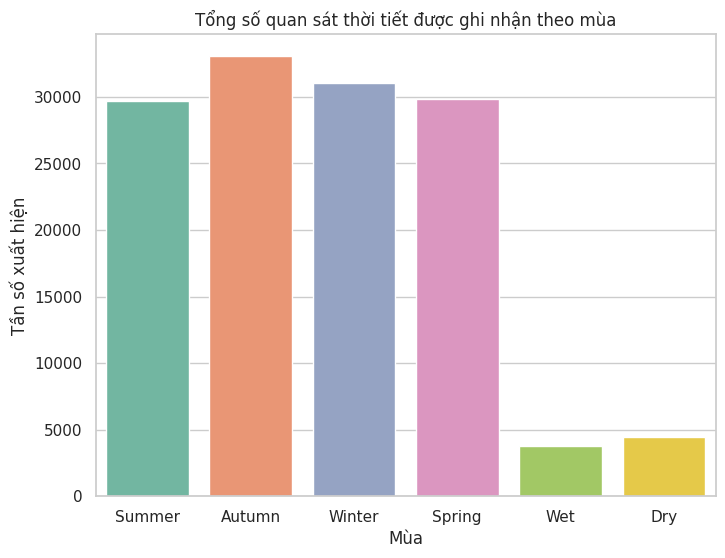

In [ ]:
sns.set(style="whitegrid")

# Biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', data=df, palette='Set2')
plt.title('Tổng số quan sát thời tiết được ghi nhận theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Tần số xuất hiện')
plt.show()

###3.1.2. Phân trăm số quan sát mỗi mùa chiến trong tổng số

In [ ]:
season_percentages = df['Season'].value_counts(normalize=True) * 100
print(season_percentages.round(2))

Autumn    25.05
Winter    23.56
Spring    22.64
Summer    22.51
Dry        3.38
Wet        2.88
Name: Season, dtype: float64


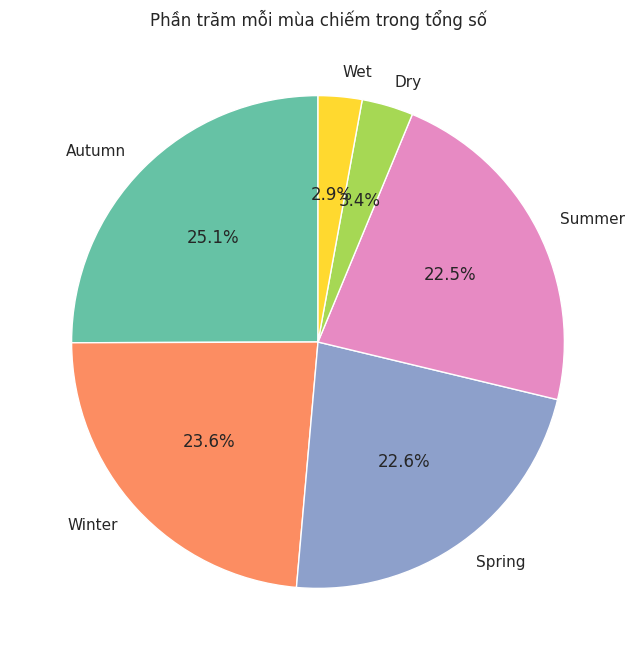

In [ ]:
# Biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Phần trăm mỗi mùa chiếm trong tổng số')
plt.show()

###3.1.3. Bảng thống kê

In [ ]:
# Tạo bảng
season_table = pd.DataFrame({
    'Tần số': season_counts,
    'Tần suất': season_percentages
})

table = PrettyTable()
table.field_names = ['Mùa', 'Tần số', 'Tần suất']
for index, row in season_table.iterrows():
    table.add_row([index, row['Tần số'].round(0), row['Tần suất'].round(2)])

print(table)

+--------+---------+----------+
|  Mùa   |  Tần số | Tần suất |
+--------+---------+----------+
| Autumn | 33052.0 |  25.05   |
| Winter | 31079.0 |  23.56   |
| Spring | 29865.0 |  22.64   |
| Summer | 29695.0 |  22.51   |
|  Dry   |  4456.0 |   3.38   |
|  Wet   |  3794.0 |   2.88   |
+--------+---------+----------+


##3.2. NĂM

###3.2.1. Tổng số lần ghi nhận quan sát thời tiết theo năm

In [ ]:
year_counts = df['Year'].value_counts()
print(year_counts)

2014    16314
2015    16082
2016    15855
2009    15364
2010    15351
2013    14936
2012    14078
2011    14031
2017     7782
2008     2091
2007       57
Name: Year, dtype: int64


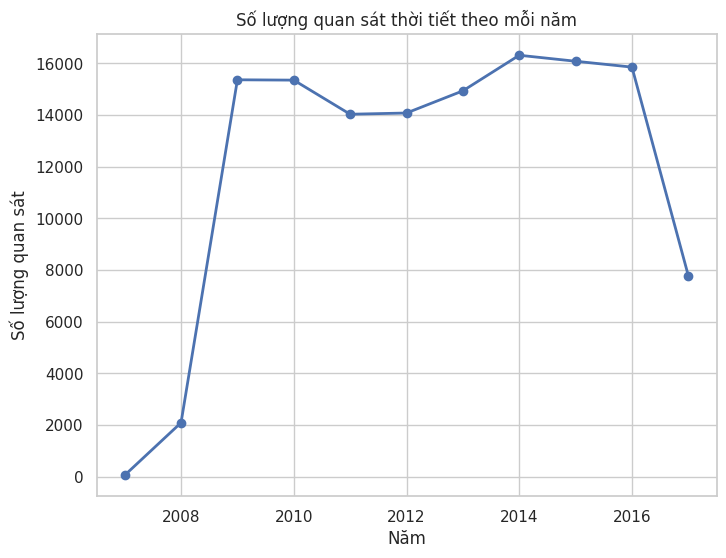

In [ ]:
# Tính số lượng quan sát thời tiết theo mỗi năm
observations_by_year = df.groupby('Year').size()

# Tạo biểu đồ đường
plt.figure(figsize=(8, 6))
observations_by_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Số lượng quan sát thời tiết theo mỗi năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng quan sát')
plt.grid(True)
plt.show()

###3.2.2. Phân trăm số quan sát mỗi năm chiến trong tổng số

In [ ]:
year_percentages = df['Year'].value_counts(normalize=True) * 100
print(year_percentages)

2014    12.364618
2015    12.188781
2016    12.016735
2009    11.644599
2010    11.634746
2013    11.320211
2012    10.669921
2011    10.634299
2017     5.898091
2008     1.584799
2007     0.043201
Name: Year, dtype: float64


###3.2.2. Bảng thống kê

In [ ]:
# Tạo bảng
season_table = pd.DataFrame({
    'Tần số': year_counts,
    'Tần suất': year_percentages
})

table = PrettyTable()
table.field_names = ['Năm', 'Tần số', 'Tần suất']
for index, row in season_table.iterrows():
    table.add_row([index, row['Tần số'].round(0), row['Tần suất'].round(2)])

print(table)

+------+---------+----------+
| Năm  |  Tần số | Tần suất |
+------+---------+----------+
| 2014 | 16314.0 |  12.36   |
| 2015 | 16082.0 |  12.19   |
| 2016 | 15855.0 |  12.02   |
| 2009 | 15364.0 |  11.64   |
| 2010 | 15351.0 |  11.63   |
| 2013 | 14936.0 |  11.32   |
| 2012 | 14078.0 |  10.67   |
| 2011 | 14031.0 |  10.63   |
| 2017 |  7782.0 |   5.9    |
| 2008 |  2091.0 |   1.58   |
| 2007 |   57.0  |   0.04   |
+------+---------+----------+


###3.2.3. Top 5 năm có số ghi nhận quan sát thời tiết cao nhất

In [ ]:
top_years = year_counts.head(5)
print(top_years)

2014    16314
2015    16082
2016    15855
2009    15364
2010    15351
Name: Year, dtype: int64


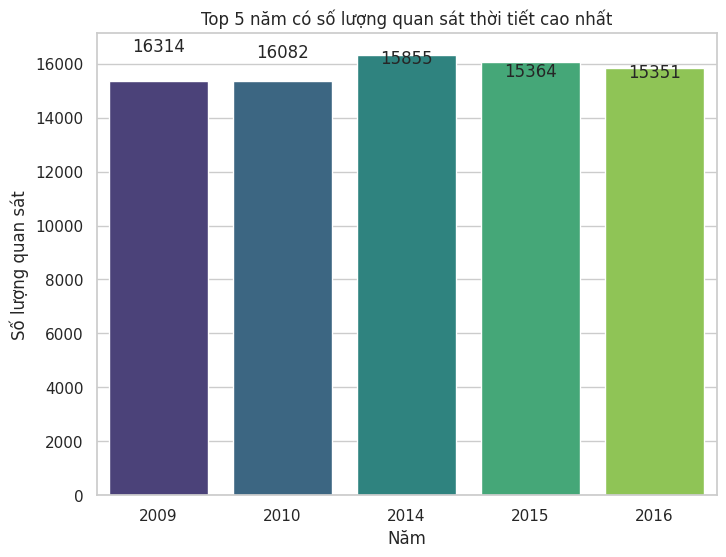

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=top_years.index, y=top_years.values, palette='viridis')

# Hiển thị số liệu cụ thể chính giữa đỉnh của mỗi cột
for index, value in enumerate(top_years.values):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 5 năm có số lượng quan sát thời tiết cao nhất')
plt.xlabel('Năm')
plt.ylabel('Số lượng quan sát')
plt.show()

In [ ]:
# Tạo bảng
table_top_years = PrettyTable()
table_top_years.field_names = ['STT', 'Năm', 'Số lần ghi nhận']
for idx, (year, count) in enumerate(top_years.items(), start=1):
    table_top_years.add_row([f'Top {idx}', year, count])

print("Bảng thống kê: Top 5 năm có số ghi nhận thông tin thời tiết cao nhất")
print(table_top_years)

Bảng thống kê: Top 5 năm có số ghi nhận thông tin thời tiết cao nhất
+-------+------+-----------------+
|  STT  | Năm  | Số lần ghi nhận |
+-------+------+-----------------+
| Top 1 | 2014 |      16314      |
| Top 2 | 2015 |      16082      |
| Top 3 | 2016 |      15855      |
| Top 4 | 2009 |      15364      |
| Top 5 | 2010 |      15351      |
+-------+------+-----------------+


###3.2.4. Top 5 tháng có số lần ghi nhận quan sát thời tiết cao nhất

In [ ]:
top_months = df.groupby(['Year', 'Month']).size().reset_index(name='Số lần ghi nhận')
top_months = top_months.sort_values(by='Số lần ghi nhận', ascending=False).head(5)

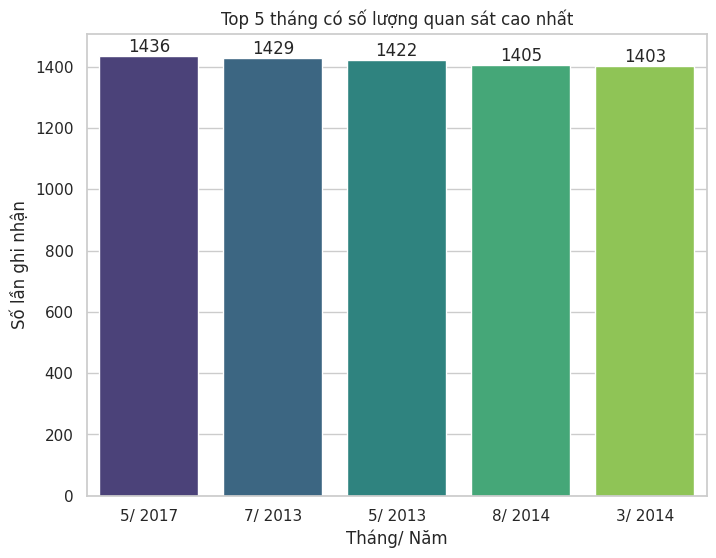

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=top_months['Month'].astype(str) + '/ ' + top_months['Year'].astype(str),
                       y='Số lần ghi nhận', data=top_months, palette='viridis')

# Thêm giá trị cụ thể cho mỗi cột
for index, value in enumerate(top_months['Số lần ghi nhận']):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 5 tháng có số lượng quan sát cao nhất')
plt.xlabel('Tháng/ Năm')
plt.ylabel('Số lần ghi nhận')
plt.show()

In [ ]:
# Tạo bảng
table_top_months = PrettyTable()
table_top_months.field_names = ['STT', 'Tháng', 'Năm', 'Số lần ghi nhận']
for idx, row in top_months.reset_index(drop=True).iterrows():
    table_top_months.add_row([f'Top {idx + 1}', row['Month'], row['Year'], row['Số lần ghi nhận']])

print("\nBảng thống kê: Top 5 tháng có số ghi nhận thông tin thời tiết cao nhất")
print(table_top_months)


Bảng thống kê: Top 5 tháng có số ghi nhận thông tin thời tiết cao nhất
+-------+-------+------+-----------------+
|  STT  | Tháng | Năm  | Số lần ghi nhận |
+-------+-------+------+-----------------+
| Top 1 |   5   | 2017 |       1436      |
| Top 2 |   7   | 2013 |       1429      |
| Top 3 |   5   | 2013 |       1422      |
| Top 4 |   8   | 2014 |       1405      |
| Top 5 |   3   | 2014 |       1403      |
+-------+-------+------+-----------------+


##3.3. KHU VỰC

###3.3.1. Tổng số lần ghi nhận quan sát thời thiết theo mỗi thành phố tại Úc

In [ ]:
# Loại bỏ những khu vực không phải là Thành phố
# Sân bay
non_city = df[~df['Location'].str.contains('Airport')]
# Khu vực Nông thôn, Núi, Quân sự
locations_to_exclude = ['BadgerysCreek', 'NorahHead', 'NorfolkIsland', 'MountGinini', 'PearceRAAF', 'SalmonGums', 'Uluru']
non_city = df[~df['Location'].isin(locations_to_exclude)]

# Thống kê tổng số lượng quan sát theo mỗi thành phố
df = df.sort_values(by='Location')
obs_per_city = non_city.groupby('Location').size().reset_index(name='Total Observations')

# Thêm thông tin về tiểu bang và khu vực
obs_per_city['Postal'] = obs_per_city['Location'].map(df.set_index('Location')['Postal'].to_dict())
obs_per_city['Region'] = obs_per_city['Location'].map(df.set_index('Location')['Region'].to_dict())
obs_per_city['Region Type'] = obs_per_city['Location'].map(df.set_index('Location')['Region Type'].to_dict())

In [ ]:
# Tạo bảng
obs_per_city_table = PrettyTable()
obs_per_city_table.field_names = ['STT', 'Tên thành phố', 'Mã bang/lãnh thổ', 'Khu vực', 'Tổng số quan sát']
for idx, row in obs_per_city.iterrows():
    obs_per_city_table.add_row([f'{idx + 1}', row['Location'], row['Postal'], row['Region'], row['Total Observations']])

# In bảng thống kê tổng số lượng quan sát theo mỗi thành phố, tiểu bang, và khu vực
print(f"\nBảng thống kê: Tổng số {idx + 1} quan sát thời tiết theo mỗi Thành phố, Tiểu bang, và Khu vực")
print(obs_per_city_table)
print(f"Tổng số lượng quan sát thời tiết được ghi nhận trong phạm vi thành phố: {obs_per_city['Total Observations'].sum()} quan sát")


Bảng thống kê: Tổng số 42 quan sát thời tiết theo mỗi Thành phố, Tiểu bang, và Khu vực
+-----+------------------+------------------+-----------+------------------+
| STT |  Tên thành phố   | Mã bang/lãnh thổ |  Khu vực  | Tổng số quan sát |
+-----+------------------+------------------+-----------+------------------+
|  1  |     Adelaide     |        SA        |   South   |       2963       |
|  2  |      Albany      |        WA        |    West   |       2405       |
|  3  |      Albury      |       NSW        | Southeast |       2910       |
|  4  |   AliceSprings   |        NT        |   North   |       2732       |
|  5  |     Ballarat     |       VIC        | Southeast |       2818       |
|  6  |     Bendigo      |       VIC        | Southeast |       2950       |
|  7  |     Brisbane     |       QLD        |    East   |       3052       |
|  8  |      Cairns      |       QLD        |    East   |       2788       |
|  9  |     Canberra     |       ACT        | Southeast |       3

###3.3.2. Tổng số lần ghi nhận quan sát thời thiết ngoài phạm vi thành phố

In [ ]:
# Chọn những khu vực ngoài phạm vi thành phố
selected_locations = df[df['Location'].str.contains('Airport') | df['Location'].isin(['BadgerysCreek',
                                       'NorahHead', 'NorfolkIsland', 'MountGinini', 'PearceRAAF', 'SalmonGums', 'Uluru'])]

# Nhóm dữ liệu theo các cột 'Location', 'Postal', 'Region', và tính tổng số quan sát
summary_table = selected_locations.groupby(['Location', 'Postal', 'Region']).size().reset_index(name='Total Observations')

In [ ]:
# Tạo bảng
obs_per_city_table = PrettyTable()
obs_per_city_table.field_names = ['STT', 'Tên địa điểm', 'Mã bang/lãnh thổ', 'Khu vực', 'Tổng số quan sát']
for idx, row in summary_table.iterrows():
    obs_per_city_table.add_row([f'{idx + 1}', row['Location'], row['Postal'], row['Region'], row['Total Observations']])

# In bảng thống kê tổng số lượng quan sát theo mỗi thành phố, tiểu bang, và khu vực
print(f"\nBảng thống kê: Tổng số {len(summary_table)} quan sát thời tiết theo mỗi Địa điểm, Tiểu bang, và Khu vực")
print(obs_per_city_table)
print(f"Tổng số lượng quan sát thời tiết được ghi nhận ngoài phạm vi thành phố: {summary_table['Total Observations'].sum()} quan sát")


Bảng thống kê: Tổng số 10 quan sát thời tiết theo mỗi Địa điểm, Tiểu bang, và Khu vực
+-----+------------------+------------------+-----------+------------------+
| STT |   Tên địa điểm   | Mã bang/lãnh thổ |  Khu vực  | Tổng số quan sát |
+-----+------------------+------------------+-----------+------------------+
|  1  |  BadgerysCreek   |       NSW        | Southeast |       2803       |
|  2  | MelbourneAirport |       VIC        | Southeast |       2603       |
|  3  |   MountGinini    |       ACT        | Southeast |       2051       |
|  4  |    NorahHead     |       NSW        | Southeast |       2648       |
|  5  |  NorfolkIsland   |       NFI        |    East   |       2813       |
|  6  |    PearceRAAF    |        WA        |    West   |       2660       |
|  7  |   PerthAirport   |        WA        |    West   |       2897       |
|  8  |    SalmonGums    |        WA        |    West   |       2895       |
|  9  |  SydneyAirport   |       NSW        | Southeast |       26

###3.3.3. Bảng Crosstab thể hiện tổng số lần ghi nhận quan sát thời tiết của từng bang/lãnh thổ theo mỗi khu vực

In [ ]:
# Tính tổng số quan sát theo 5 khu vực và 9 mã bang/lãnh thổ
crosstab_result = pd.crosstab(df['Region'], df['Postal'], margins=True, margins_name='Tổng cộng')
table_str = tabulate(crosstab_result, headers='keys', tablefmt='pretty')
print("Bảng Crosstab: Tổng số quan sát thời tiết theo 5 khu vực và 9 bang/lãnh thổ")
print(table_str)

Bảng Crosstab: Tổng số quan sát thời tiết theo 5 khu vực và 9 bang/lãnh thổ
+-----------+------+------+-------+------+-------+-------+------+-------+-------+-----------+
|  Region   | ACT  | NFI  |  NSW  |  NT  |  QLD  |  SA   | TAS  |  VIC  |  WA   | Tổng cộng |
+-----------+------+------+-------+------+-------+-------+------+-------+-------+-----------+
|   East    |  0   | 2813 |   0   |  0   | 11422 |   0   |  0   |   0   |   0   |   14235   |
|   North   |  0   |  0   |   0   | 8250 |   0   |   0   |  0   |   0   |   0   |   8250    |
|   South   |  0   |  0   |   0   |  0   |   0   | 11423 |  0   |   0   |   0   |   11423   |
| Southeast | 8217 |  0   | 38564 |  0   |   0   |   0   | 5614 | 26121 |   0   |   78516   |
|   West    |  0   |  0   |   0   |  0   |   0   |   0   |  0   |   0   | 19517 |   19517   |
| Tổng cộng | 8217 | 2813 | 38564 | 8250 | 11422 | 11423 | 5614 | 26121 | 19517 |  131941   |
+-----------+------+------+-------+------+-------+-------+------+-------+-----

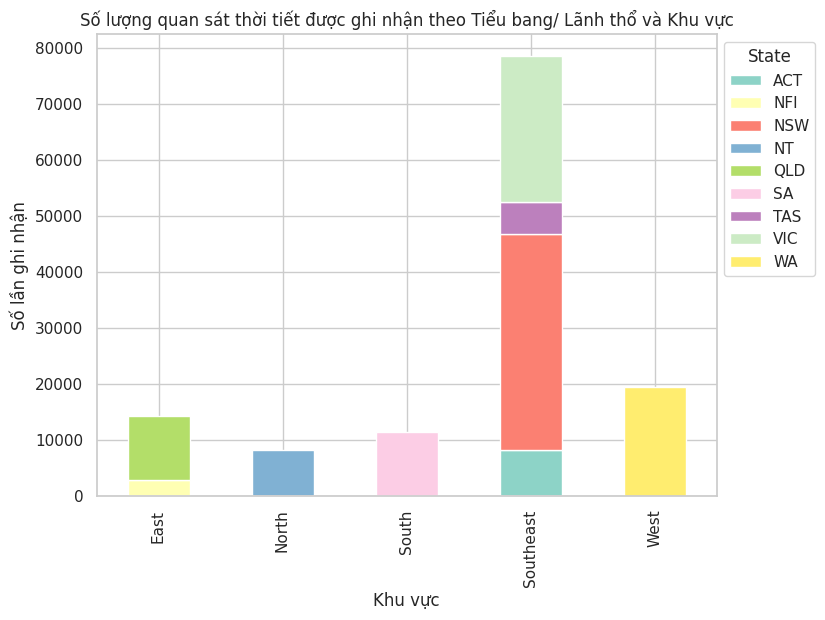

In [ ]:
grouped_data = df.groupby(['Postal', 'Region']).size().unstack()

#Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 6))
grouped_data.T.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
plt.xlabel('Khu vực')
plt.ylabel('Số lần ghi nhận')
plt.title('Số lượng quan sát thời tiết được ghi nhận theo Tiểu bang/ Lãnh thổ và Khu vực')
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

###3.3.4. Top 3 bang/lãnh thổ có tổng số ghi nhận quan sát thời tiết cao nhất trong khu vực có tổng số quan sát lớn nhất

In [ ]:
# Tính tổng số quan sát cho mỗi khu vực
region_observation_counts = df.groupby('Region')['Location'].count()
max_observation_region = region_observation_counts.idxmax()
max_observation_df = df[df['Region'] == max_observation_region]

# Tính số quan sát cho mỗi bang/lãnh thổ trong khu vực có số quan sát lớn nhất
postal_observation_counts = max_observation_df['Postal'].value_counts()

# Lấy top 3 bang/lãnh thổ khác nhau với số lượng ghi nhận thời tiết cao nhất
top3_postal = postal_observation_counts.head(3)

print(f"Khu vực có số quan sát lớn nhất là: {max_observation_region}\n")
print("3 bang/lãnh thổ có số lượng ghi nhận thời tiết cao nhất:")
for idx, (postal, _) in enumerate(top3_postal.items(), start=1):
    print(f"Top {idx}: {postal}")

Khu vực có số quan sát lớn nhất là: Southeast

3 bang/lãnh thổ có số lượng ghi nhận thời tiết cao nhất:
Top 1: NSW
Top 2: VIC
Top 3: ACT


In [ ]:
# Tạo bảng
table_top3_postal = PrettyTable()
table_top3_postal.field_names = ['STT', 'Mã bang/lãnh thổ', 'Tên bang/lãnh thổ', 'Số lượng quan sát']

# Lấy top 3 Postal khác nhau với số lượng ghi nhận thời tiết cao nhất
for idx, (postal, count) in enumerate(top3_postal.items(), start=1):
    # Lấy tên đầy đủ từ DataFrame
    full_name = df.loc[df['Postal'] == postal, 'State/Territory'].iloc[0]
    table_top3_postal.add_row([f'Top {idx}', postal, full_name, count])

# Hiển thị kết quả
print(f"Bảng thống kê: Top 3 bang/lãnh thổ có số ghi nhận thời tiết cao nhất trong khu vực {max_observation_region}")
print(table_top3_postal)

Bảng thống kê: Top 3 bang/lãnh thổ có số ghi nhận thời tiết cao nhất trong khu vực Southeast
+-------+------------------+------------------------------+-------------------+
|  STT  | Mã bang/lãnh thổ |      Tên bang/lãnh thổ       | Số lượng quan sát |
+-------+------------------+------------------------------+-------------------+
| Top 1 |       NSW        |       New South Wales        |       38564       |
| Top 2 |       VIC        |           Victoria           |       26121       |
| Top 3 |       ACT        | Australian Capital Territory |        8217       |
+-------+------------------+------------------------------+-------------------+


##3.4. NHIỆT ĐỘ

###3.4.1. Phân tích nhiệt độ tối thiểu được ghi nhận tại mỗi quan sát

####a. Thống kê mô tả

In [ ]:
# Lấy giá trị của cột MinTemp
min_temp_data = data['MinTemp']

# Tổng số quan sát
total_observations = len(min_temp_data)
print(f"Tổng số lượng quan sát: {total_observations}")

# Tính các giá trị thống kê mô tả
mean_value = min_temp_data.mean()
median_value = min_temp_data.median()
min_value = min_temp_data.min()
max_value = min_temp_data.max()
std_deviation = min_temp_data.std(ddof=1)

# In các giá trị thống kê mô tả
print("Bảng thống kê mô tả cho biến MinTemp (Nhiệt độ tối thiểu):")
summary_table = {
    "Mean": [mean_value],
    "Median": [median_value],
    "Min": [min_value],
    "Max": [max_value],
    "Standard Deviation": [std_deviation]
}

# Vẽ khung cho bảng giá trị thống kê
print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

Tổng số lượng quan sát: 131941
Bảng thống kê mô tả cho biến MinTemp (Nhiệt độ tối thiểu):
╒═════════╤══════════╤═══════╤═══════╤══════════════════════╕
│    Mean │   Median │   Min │   Max │   Standard Deviation │
╞═════════╪══════════╪═══════╪═══════╪══════════════════════╡
│ 12.0537 │     11.9 │  -6.9 │    31 │              6.30725 │
╘═════════╧══════════╧═══════╧═══════╧══════════════════════╛


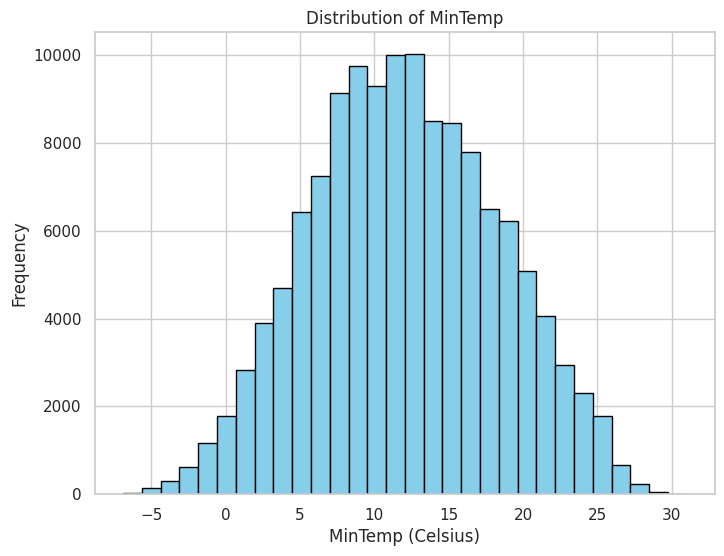

In [ ]:
# Biểu đồ tần suất (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(min_temp_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MinTemp')
plt.xlabel('MinTemp (Celsius)')
plt.ylabel('Frequency')
plt.show()

####b. Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối thiểu thấp hơn mức trung bình

In [ ]:
# Đếm số lần ghi nhận có nhiệt độ tối thiểu thấp hơn trung bình
below_average_count = (min_temp_data < mean_value).sum()

# Tính phần trăm
percentage_below_average = (below_average_count / total_observations) * 100

print(f"Số lần ghi nhận nhiệt độ tối thiểu dưới mức trung bình: {below_average_count}")
print(f"Tỷ lệ phần trăm ghi nhận nhiệt độ tối thiểu dưới trung bình: {percentage_below_average:.2f}%")

Số lần ghi nhận nhiệt độ tối thiểu dưới mức trung bình: 67313
Tỷ lệ phần trăm ghi nhận nhiệt độ tối thiểu dưới trung bình: 51.02%


In [ ]:
# Đếm số lần quan sát có nhiệt độ tối thiểu <= 0
num_observations_below_zero = (min_temp_data <= 0).sum()

# Tính phần trăm
percentage_below_zero = (num_observations_below_zero / total_observations) * 100

# In kết quả
print(f"Số quan sát có nhiệt độ tối thiểu <= 0 độ Celsius: {num_observations_below_zero}")
print(f"Tỷ lệ phần trăm ghi nhận nhiệt độ tối thiểu dưới <= 0 độ Celsius: {percentage_below_zero:.2f}%")

Số quan sát có nhiệt độ tối thiểu <= 0 độ Celsius: 3080
Tỷ lệ phần trăm ghi nhận nhiệt độ tối thiểu dưới <= 0 độ Celsius: 2.33%


####c. Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối thiểu cao hơn mức trung bình

In [ ]:
# Đếm số lần ghi nhận có nhiệt độ tối thiểu thấp hơn trung bình
above_average_count = (min_temp_data > mean_value).sum()

# Tổng số quan sát
total_observations = len(min_temp_data)

# Tính phần trăm
percentage_above_average = (below_average_count / total_observations) * 100

print(f"Số lần ghi nhận nhiệt độ tối thiểu cao hơn mức trung bình: {above_average_count}")
print(f"Tỷ lệ phần trăm ghi nhận nhiệt độ tối thiểu cao hơn trung bình: {percentage_above_average:.2f}%")

Số lần ghi nhận nhiệt độ tối thiểu cao hơn mức trung bình: 64628
Tỷ lệ phần trăm ghi nhận nhiệt độ tối thiểu cao hơn trung bình: 51.02%


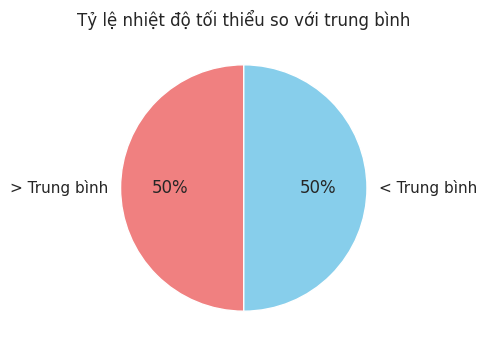

In [ ]:
# Vẽ biểu đồ
labels = ['> Trung bình', '< Trung bình']
sizes = [percentage_above_average, percentage_below_average]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ nhiệt độ tối thiểu so với trung bình')
plt.show()

###3.4.1. Phân tích nhiệt độ tối đa được ghi nhận tại mỗi quan sát

####a. Thống kê mô tả

In [ ]:
# Lấy giá trị của cột MinTemp
max_temp_data = data['MaxTemp']

# Tổng số quan sát
total_observations = len(min_temp_data)
print(f"Tổng số lượng quan sát: {total_observations}")

# Tính các giá trị thống kê mô tả
mean_value = max_temp_data.mean()
median_value = max_temp_data.median()
min_value = max_temp_data.min()
max_value = max_temp_data.max()
std_deviation = max_temp_data.std(ddof=1)

# In các giá trị thống kê mô tả
print("Bảng thống kê mô tả cho biến MaxTemp (Nhiệt độ tối đa):")
summary_table = {
    "Mean": [mean_value],
    "Median": [median_value],
    "Min": [min_value],
    "Max": [max_value],
    "Standard Deviation": [std_deviation]
}

# Vẽ khung cho bảng giá trị thống kê
print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

Tổng số lượng quan sát: 131941
Bảng thống kê mô tả cho biến MaxTemp (Nhiệt độ tối đa):
╒═════════╤══════════╤═══════╤═══════╤══════════════════════╕
│    Mean │   Median │   Min │   Max │   Standard Deviation │
╞═════════╪══════════╪═══════╪═══════╪══════════════════════╡
│ 23.3119 │     22.8 │   2.1 │  44.5 │              6.88903 │
╘═════════╧══════════╧═══════╧═══════╧══════════════════════╛


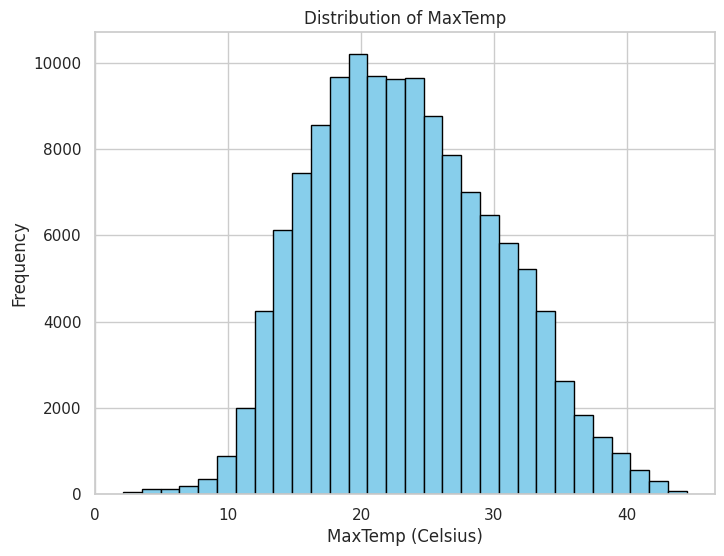

In [ ]:
# Biểu đồ tần suất (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(max_temp_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MaxTemp')
plt.xlabel('MaxTemp (Celsius)')
plt.ylabel('Frequency')
plt.show()

####b. Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối đa thấp hơn mức trung bình

In [ ]:
# Đếm số lần ghi nhận có nhiệt độ tối đa thấp hơn trung bình
below_average_count = (max_temp_data < mean_value).sum()

# Tính phần trăm
percentage_below_average = (below_average_count / total_observations) * 100

print(f"Số lần ghi nhận nhiệt độ tối đa dưới mức trung bình: {below_average_count}")
print(f"Tỷ lệ phần trăm ghi nhận nhiệt độ tối đa dưới trung bình: {percentage_below_average:.2f}%")

Số lần ghi nhận nhiệt độ tối đa dưới mức trung bình: 69896
Tỷ lệ phần trăm ghi nhận nhiệt độ tối đa dưới trung bình: 52.98%


####c. Tổng số ghi nhận quan sát thời tiết có nhiệt độ tối đa cao hơn mức trung bình

In [ ]:
# Đếm số lần ghi nhận có nhiệt độ tối đa cao hơn trung bình
above_average_count = (max_temp_data > mean_value).sum()

# Tính phần trăm
percentage_above_average = (above_average_count / total_observations) * 100

print(f"Số lần ghi nhận nhiệt độ tối đa cao hơn mức trung bình: {above_average_count}")
print(f"Tỷ lệ phần trăm ghi nhận nhiệt độ tối đa cao hơn trung bình: {percentage_above_average:.2f}%")

Số lần ghi nhận nhiệt độ tối đa cao hơn mức trung bình: 62045
Tỷ lệ phần trăm ghi nhận nhiệt độ tối đa cao hơn trung bình: 47.02%


In [ ]:
# Đếm số lần ghi nhận có nhiệt độ tối đa cao >= 35 độ Celsius
num_observations_above_30 = (max_temp_data >= 35).sum()

# Tính phần trăm
percentage_above_30 = (num_observations_above_30 / total_observations) * 100

# In kết quả
print(f"Số quan sát có nhiệt độ tối đa >= 30 độ Celsius: {num_observations_above_30}")
print(f"Tỷ lệ phần trăm ghi nhận nhiệt độ tối đa >= 30 độ Celsius: {percentage_above_30:.2f}%")

Số quan sát có nhiệt độ tối đa >= 30 độ Celsius: 6996
Tỷ lệ phần trăm ghi nhận nhiệt độ tối đa >= 30 độ Celsius: 5.30%


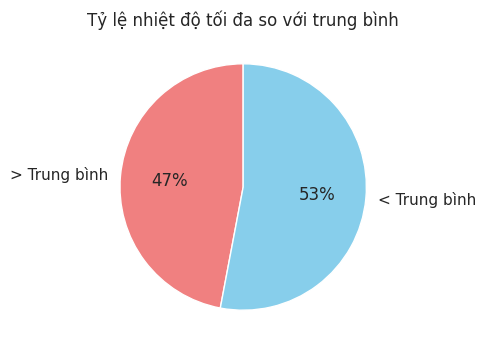

In [ ]:
# Vẽ biểu đồ
labels = ['> Trung bình', '< Trung bình']
sizes = [percentage_above_average, percentage_below_average]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ nhiệt độ tối đa so với trung bình')
plt.show()

##3.5. LƯỢNG MƯA

#### a. Thống kê mô tả

In [ ]:
rain_day = df.loc[(df['Rainfall'] !=0)]['Rainfall']
no_rain_day = df.loc[(df['Rainfall'] ==0)]['Rainfall']
rain0 = df.loc[(df['Rainfall'] == 0)]
most_frequent_value = df['Rainfall'].value_counts().idxmax()
m_frequency = rain_day.value_counts().max()

least_frequent_value = df['Rainfall'].value_counts().idxmin()
l_frequency = df['Rainfall'].value_counts().min()

print(f'Số ngày quan sát: {df.shape[0]}')
print(f'Số ngày có mưa: {rain_day.shape[0]}// chiếm {(rain_day.shape[0]/df.shape[0])*100:.0f}%')
print(f'Số ngày không có mưa: {no_rain_day.shape[0]}// chiếm {(no_rain_day.shape[0]/df.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện nhiều nhất: {most_frequent_value} với {m_frequency} lần xuất hiện // chiếm {(m_frequency/rain_day.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện ít nhất: {least_frequent_value} với {l_frequency} lần xuất hiện // chiếm {(l_frequency/rain_day.shape[0])*100:.4f}%')


Số ngày quan sát: 131941
Số ngày có mưa: 45705// chiếm 35%
Số ngày không có mưa: 86236// chiếm 65%
Giá trị xuất hiện nhiều nhất: 0.0 với 8336 lần xuất hiện // chiếm 18%
Giá trị xuất hiện ít nhất: 9.1 với 1 lần xuất hiện // chiếm 0.0022%


In [ ]:
max = rain_day.max()
min = rain_day.min()
std = rain_day.std(ddof = 1)
mean = rain_day.mean()
median = rain_day.median()

print("Bảng thống kê mô tả cho biến Rainfall (lượng mưa trung bình):")
summary_table = {
    "Mean": [mean],
    "Median": [median],
    "Min": [min],
    "Max": [max],
    "Standard Deviation": [std]
}

print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

Bảng thống kê mô tả cho biến Rainfall (lượng mưa trung bình):
╒═════════╤══════════╤═══════╤═══════╤══════════════════════╕
│    Mean │   Median │   Min │   Max │   Standard Deviation │
╞═════════╪══════════╪═══════╪═══════╪══════════════════════╡
│ 4.13268 │      1.8 │   0.1 │  27.4 │               5.4696 │
╘═════════╧══════════╧═══════╧═══════╧══════════════════════╛


In [ ]:
rain05 = df.loc[(df['Rainfall'] > 0) & (df['Rainfall'] <= 0.5)]['Rainfall']
rainup05 = df.loc[(df['Rainfall'] > 0.5)]['Rainfall']
print(f'Số ngày có lượng mưa dưới mức trung bình (0,5 mm): {rain05.shape[0]}// Chiếm {(rain05.shape[0]/rain_day.shape[0])*100:.0f}%')
print(f'Số ngày có lượng mưa trên mức trung bình (0,5 mm): {rainup05.shape[0]}// Chiếm {(rainup05.shape[0]/rain_day.shape[0])*100:.0f}%')

Số ngày có lượng mưa dưới mức trung bình (0,5 mm): 12111// Chiếm 26%
Số ngày có lượng mưa trên mức trung bình (0,5 mm): 33594// Chiếm 74%


####b. Biểu đồ

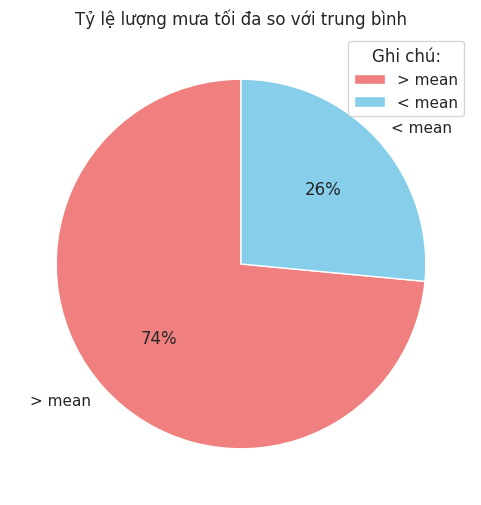

In [ ]:
per_low_mean = rain05.shape[0]/rain_day.shape[0]
per_up_mean  = rainup05.shape[0]/rain_day.shape[0]
labels = ['> mean', '< mean']
sizes = [per_up_mean, per_low_mean]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ lượng mưa tối đa so với trung bình')
plt.legend(title = 'Ghi chú:', loc = 1)
plt.show()


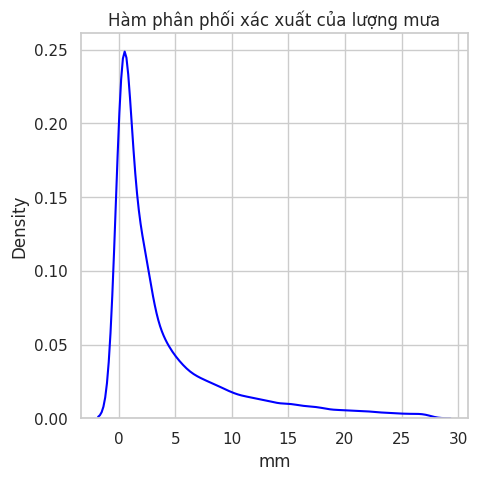

In [ ]:
#Biểu đồ phân phối
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

sns.distplot(rain_day, hist = False, color = 'blue')


# Thêm nhãn và tên 2 trục
plt.xlabel('mm')
plt.ylabel('Density')
plt.title('Hàm phân phối xác xuất của lượng mưa')


plt.show()


##3.6 HƯỚNG GIÓ

####a. Thống kê mô tả

In [ ]:
windD = df['WindGustDir'].unique().tolist()
print('Các loại hướng gió:')
for i in windD:
  print(i)

Các loại hướng gió:
E
WNW
NW
W
ENE
SW
WSW
SSE
SE
N
SSW
NNE
ESE
S
NNW
NE


In [ ]:
windD_counts = df['WindGustDir'].value_counts()
windD_per = windD_counts/df.shape[0]
print(windD_counts)

W      16838
SE      8794
E       8623
SSE     8467
SW      8317
S       8239
WSW     8230
N       8193
SSW     8086
ENE     7669
WNW     7260
NW      7238
ESE     6964
NE      6785
NNE     6146
NNW     6092
Name: WindGustDir, dtype: int64


In [ ]:
# Tạo bảng
season_table = pd.DataFrame({
    'Tần số': windD_counts,
    'Tần suất': windD_per
})

table = PrettyTable()
table.field_names = ['Hướng gió', 'Tần số', 'Tần suất']
for index, row in season_table.iterrows():
    table.add_row([index, row['Tần số'].round(0), row['Tần suất'].round(2)])

print(table)

+-----------+---------+----------+
| Hướng gió |  Tần số | Tần suất |
+-----------+---------+----------+
|     W     | 16838.0 |   0.13   |
|     SE    |  8794.0 |   0.07   |
|     E     |  8623.0 |   0.07   |
|    SSE    |  8467.0 |   0.06   |
|     SW    |  8317.0 |   0.06   |
|     S     |  8239.0 |   0.06   |
|    WSW    |  8230.0 |   0.06   |
|     N     |  8193.0 |   0.06   |
|    SSW    |  8086.0 |   0.06   |
|    ENE    |  7669.0 |   0.06   |
|    WNW    |  7260.0 |   0.06   |
|     NW    |  7238.0 |   0.05   |
|    ESE    |  6964.0 |   0.05   |
|     NE    |  6785.0 |   0.05   |
|    NNE    |  6146.0 |   0.05   |
|    NNW    |  6092.0 |   0.05   |
+-----------+---------+----------+


####b. Biểu đồ

In [ ]:
direction_mapping = {'W': 'West', 'WNW': 'West', 'NE': 'North', 'N':'North', 'SSE':'South', 'S':'South', 'SW':'South', 'NNW':'North', 'SE':'South', 'WSW':'West', 'NNE':'North','E':'East', 'NW':'North', 'SSW':'South', 'ESE':'East', 'ENE':'East'}
df['WindGustDir'] = df['WindGustDir'].map(direction_mapping)
windD_counts = df['WindGustDir'].value_counts()
windD_per = windD_counts/df.shape[0]

In [ ]:
west = []
north = []
east = []
south = []
for i in windD:
  if (i[0] == 'W'):
      west.append(i)
  elif (i[0] == 'S'):
      south.append(i)
  elif (i[0] == 'E'):
      east.append(i)
  elif (i[0] == 'N'):
      north.append(i)

In [ ]:
print(f'Có {len(west)} hướng gió thuộc nhóm gió Tây: {west}')
print(f'Có {len(east)} hướng gió thuộc nhóm gió Đông: {east}')
print(f'Có {len(north)} hướng gió thuộc nhóm gió Bắc: {north}')
print(f'Có {len(south)} hướng gió thuộc nhóm gió Nam: {south}')

Có 3 hướng gió thuộc nhóm gió Tây: ['WNW', 'W', 'WSW']
Có 3 hướng gió thuộc nhóm gió Đông: ['E', 'ENE', 'ESE']
Có 5 hướng gió thuộc nhóm gió Bắc: ['NW', 'N', 'NNE', 'NNW', 'NE']
Có 5 hướng gió thuộc nhóm gió Nam: ['SW', 'SSE', 'SE', 'SSW', 'S']


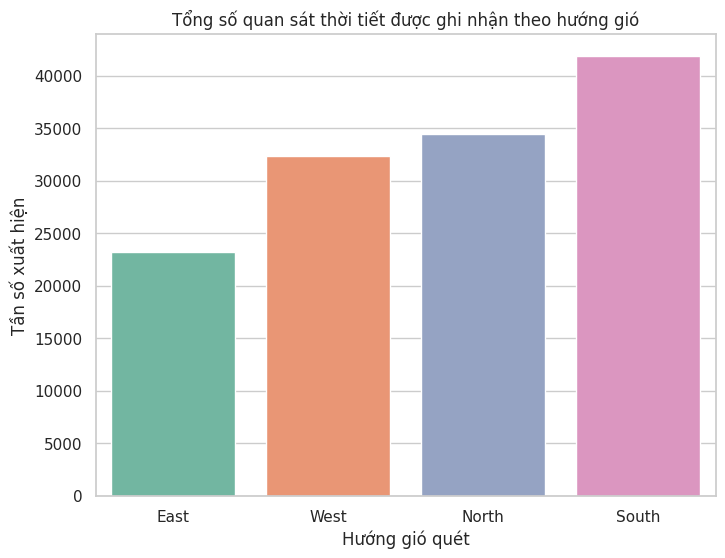

In [ ]:
sns.set(style="whitegrid")

# Biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x='WindGustDir', data=df, palette='Set2')
plt.title('Tổng số quan sát thời tiết được ghi nhận theo hướng gió')
plt.xlabel('Hướng gió quét')
plt.ylabel('Tần số xuất hiện')
plt.show()

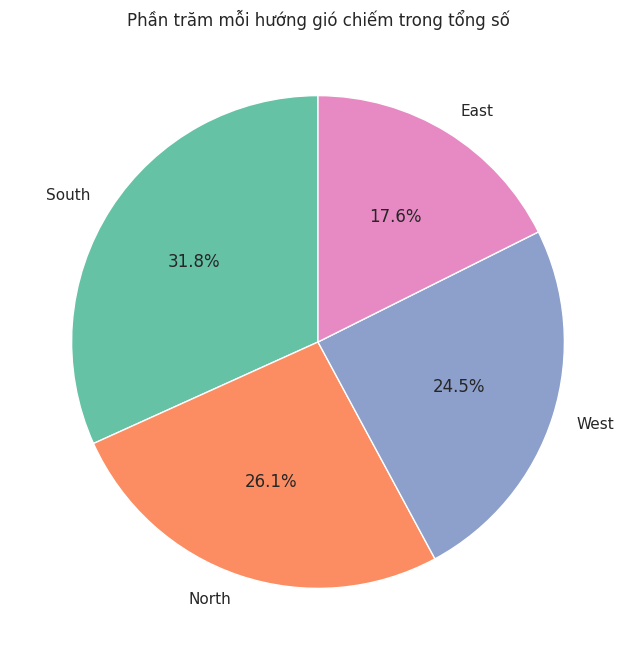

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(windD_counts, labels=windD_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Phần trăm mỗi hướng gió chiếm trong tổng số')
plt.show()

##3.7 TỐC ĐỘ GIÓ

###3.7.1 Tốc độ gió quét

####a. Thống kê mô tả

In [ ]:
windspeed = df['WindGustSpeed']

In [ ]:
most_frequent_value1 = windspeed.value_counts().idxmax()
m_frequency1 = windspeed.value_counts().max()

least_frequent_value1 = windspeed.value_counts().idxmin()
l_frequency1 = windspeed.value_counts().min()

print(f'Số ngày quan sát: {df.shape[0]}')
print(f'Giá trị xuất hiện nhiều nhất: {most_frequent_value1} với {m_frequency1} lần xuất hiện //chiếm {(m_frequency1/df.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện ít nhất: {least_frequent_value1} với {l_frequency1} lần xuất hiện //chiếm {(l_frequency1/df.shape[0])*100:.4f}%')

Số ngày quan sát: 131941
Giá trị xuất hiện nhiều nhất: 35.0 với 8793 lần xuất hiện //chiếm 7%
Giá trị xuất hiện ít nhất: 6.0 với 1 lần xuất hiện //chiếm 0.0008%


In [ ]:
max1 = windspeed.max()
min1 = windspeed.min()
std1 = windspeed.std(ddof = 1)
mean1 = statistics.harmonic_mean(windspeed)
median1 = windspeed.median()

print("Bảng thống kê mô tả cho biến WindGustSpeed (Tốc độ gió quét):")
summary_table = {
    "Mean": [mean1],
    "Median": [median1],
    "Min": [min1],
    "Max": [max1],
    "Standard Deviation": [std1]
}

print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

Bảng thống kê mô tả cho biến WindGustSpeed (Tốc độ gió quét):
╒═════════╤══════════╤═══════╤═══════╤══════════════════════╕
│    Mean │   Median │   Min │   Max │   Standard Deviation │
╞═════════╪══════════╪═══════╪═══════╪══════════════════════╡
│ 35.0742 │       39 │     6 │    78 │              11.6718 │
╘═════════╧══════════╧═══════╧═══════╧══════════════════════╛


In [ ]:
windupmean = df.loc[(df['WindGustSpeed'] > 0) & (df['WindGustSpeed'] <= mean1)]['WindGustSpeed']
windlowmean = df.loc[(df['WindGustSpeed'] > mean1)]['WindGustSpeed']
print(f'Số ngày có tốc độ gió quét dưới mức trung bình ({mean1:.4f} km/h): {windupmean.shape[0]} chiếm {(windupmean.shape[0]/df.shape[0])*100:.0f}%')
print(f'Số ngày có tốc độ gió quét trên mức trung bình ({mean1:.4f} km/h): {windlowmean.shape[0]} chiếm {(windlowmean.shape[0]/df.shape[0])*100:.0f}%')

Số ngày có tốc độ gió quét dưới mức trung bình (35.0742 km/h): 56159 chiếm 43%
Số ngày có tốc độ gió quét trên mức trung bình (35.0742 km/h): 75782 chiếm 57%


####b. Biểu đồ

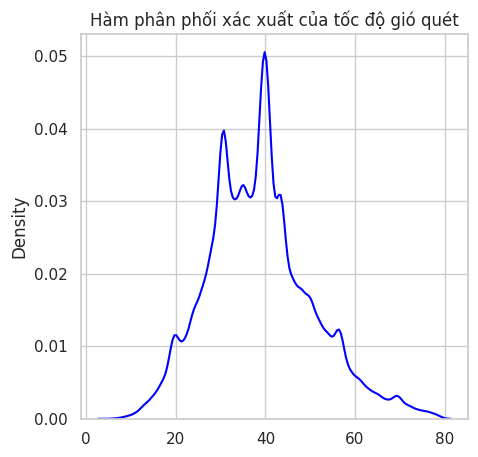

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

sns.distplot(windspeed, hist = False, color = 'blue')


# Thêm nhãn và tên 2 trục
plt.xlabel('')
plt.ylabel('Density')
plt.title('Hàm phân phối xác xuất của tốc độ gió quét')


plt.show()

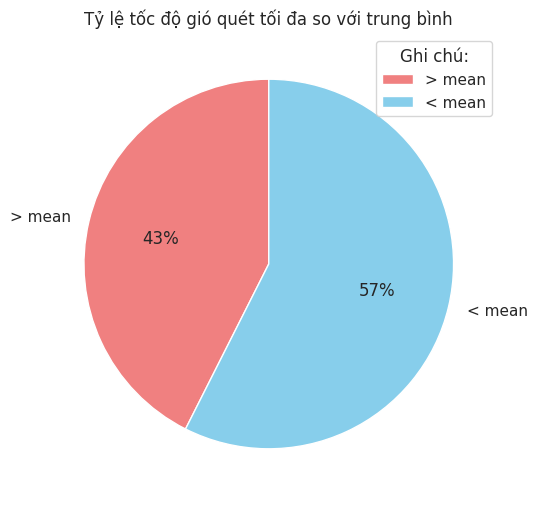

In [ ]:
per_low_mean = windlowmean.shape[0]/df.shape[0]
per_up_mean  = windupmean.shape[0]/df.shape[0]
labels = ['> mean', '< mean']
sizes = [per_up_mean, per_low_mean]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ tốc độ gió quét tối đa so với trung bình')
plt.legend(title = 'Ghi chú:', loc = 1)
plt.show()

###3.7.2 Tốc độ gió vào buổi sáng

####a. Thống kê mô tả

In [ ]:
windspeed9am = df.loc[df['WindSpeed9am'] != 0, 'WindSpeed9am']
non_wind9am = df.loc[df['WindSpeed9am'] == 0, 'WindSpeed9am']

In [ ]:
most_frequent_value2 = windspeed9am.value_counts().idxmax()
m_frequency2 = windspeed9am.value_counts().max()

least_frequent_value2 = windspeed9am.value_counts().idxmin()
l_frequency2 = windspeed9am.value_counts().min()

print(f'Số ngày quan sát: {df.shape[0]}')
print(f'Số ngày có gió vào buổi sáng: {windspeed9am.shape[0]}// chiếm {(windspeed9am.shape[0]/df.shape[0])*100:.0f}%')
print(f'Số ngày không có gió vào buổi sáng: {non_wind9am.shape[0]}// chiếm {(non_wind9am.shape[0]/df.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện nhiều nhất: {most_frequent_value2} với {m_frequency2} lần xuất hiện // chiếm {(m_frequency2/df.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện ít nhất: {least_frequent_value2} với {l_frequency2} lần xuất hiện // chiếm {(l_frequency2/df.shape[0])*100:.4f}%')

Số ngày quan sát: 131941
Số ngày có gió vào buổi sáng: 123705// chiếm 94%
Số ngày không có gió vào buổi sáng: 8236// chiếm 6%
Giá trị xuất hiện nhiều nhất: 9.0 với 12726 lần xuất hiện // chiếm 10%
Giá trị xuất hiện ít nhất: 39.0 với 304 lần xuất hiện // chiếm 0.2304%


In [ ]:
max2 = windspeed9am.max()
min2 = windspeed9am.min()
std2 = windspeed9am.std(ddof = 1)
mean2 = statistics.harmonic_mean(windspeed9am)
median2 = windspeed9am.median()

print("Bảng thống kê mô tả cho biến WindSpeed9am (tốc độ gió vào buổi sáng):")
summary_table = {
    "Mean": [mean2],
    "Median": [median2],
    "Min": [min2],
    "Max": [max2],
    "Standard Deviation": [std2]
}

print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

Bảng thống kê mô tả cho biến WindSpeed9am (tốc độ gió vào buổi sáng):
╒═════════╤══════════╤═══════╤═══════╤══════════════════════╕
│    Mean │   Median │   Min │   Max │   Standard Deviation │
╞═════════╪══════════╪═══════╪═══════╪══════════════════════╡
│ 9.58342 │       13 │     2 │    39 │              7.61758 │
╘═════════╧══════════╧═══════╧═══════╧══════════════════════╛


In [ ]:
wind9amupmean = df.loc[(df['WindSpeed9am'] > 0) & (df['WindSpeed9am'] <= mean2)]['WindSpeed9am']
wind9amlowmean = df.loc[(df['WindSpeed9am'] > mean2)]['WindSpeed9am']
print(f'Số ngày có tốc độ gió vào buổi sáng dưới mức trung bình ({mean2:.4f} km/h): {wind9amupmean.shape[0]} chiếm {(wind9amupmean.shape[0]/windspeed9am.shape[0])*100:.0f}%')
print(f'Số ngày có tốc độ gió vào buổi sáng trên mức trung bình ({mean2:.4f} km/h): {wind9amlowmean.shape[0]} chiếm {(wind9amlowmean.shape[0]/windspeed9am.shape[0])*100:.0f}%')

Số ngày có tốc độ gió vào buổi sáng dưới mức trung bình (9.5834 km/h): 41973 chiếm 34%
Số ngày có tốc độ gió vào buổi sáng trên mức trung bình (9.5834 km/h): 81732 chiếm 66%


####b. Biểu đồ

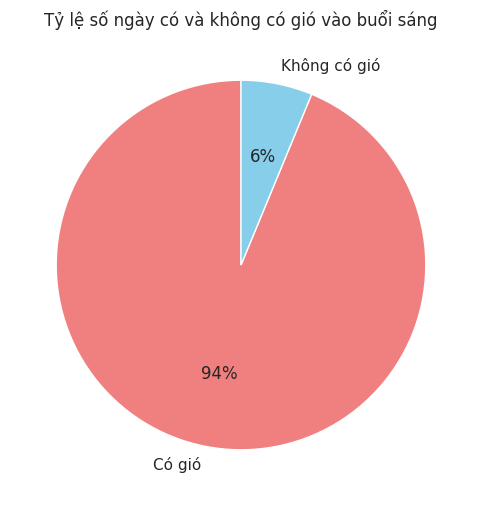

In [ ]:
per_wind = windspeed9am.shape[0]/df.shape[0]
per_non_wind = non_wind9am.shape[0]/df.shape[0]
labels = ['Có gió', 'Không có gió']
sizes = [per_wind, per_non_wind]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ số ngày có và không có gió vào buổi sáng')

plt.show()

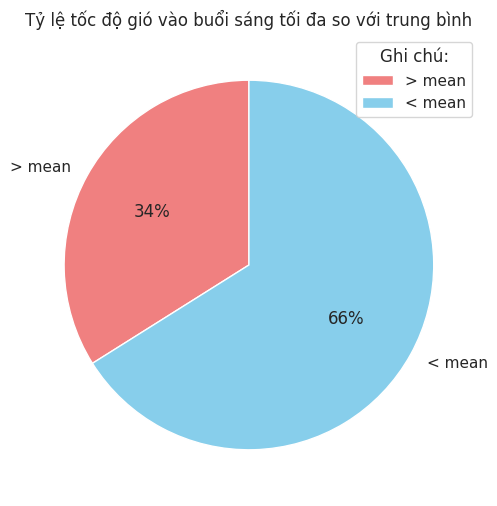

In [ ]:
per_low_mean2 = wind9amlowmean.shape[0]/windspeed9am.shape[0]
per_up_mean2  = wind9amupmean.shape[0]/windspeed9am.shape[0]
labels = ['> mean', '< mean']
sizes = [per_up_mean2, per_low_mean2]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ tốc độ gió vào buổi sáng tối đa so với trung bình')
plt.legend(title = 'Ghi chú:', loc = 1)
plt.show()

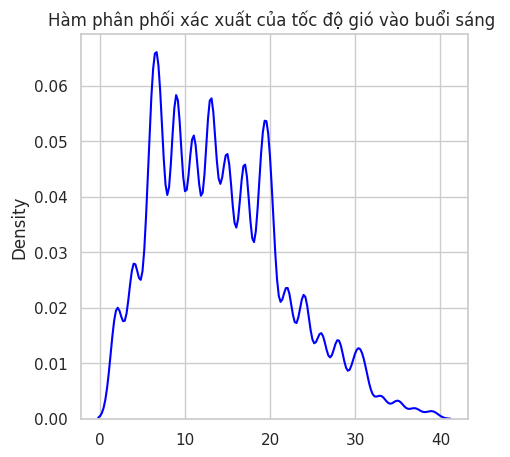

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

sns.distplot(windspeed9am, hist = False, color = 'blue')


# Thêm nhãn và tên 2 trục
plt.xlabel('')
plt.ylabel('Density')
plt.title('Hàm phân phối xác xuất của tốc độ gió vào buổi sáng ')


plt.show()

###3.7.3 Tốc độ gió vào buổi tối

####a. Thống kê mô tả

In [ ]:
windspeed3pm = df.loc[df['WindSpeed3pm'] != 0, 'WindSpeed3pm']
non_wind3pm = df.loc[df['WindSpeed3pm'] == 0, 'WindSpeed3pm']

In [ ]:
most_frequent_value3 = windspeed3pm.value_counts().idxmax()
m_frequency3 = windspeed3pm.value_counts().max()

least_frequent_value3 = windspeed3pm.value_counts().idxmin()
l_frequency3 = windspeed3pm.value_counts().min()

print(f'Số ngày quan sát: {df.shape[0]}')
print(f'Số ngày có gió vào buổi tối: {windspeed3pm.shape[0]}// chiếm {(windspeed3pm.shape[0]/df.shape[0])*100:.0f}%')
print(f'Số ngày không có gió vào buổi tối: {non_wind3pm.shape[0]}// chiếm {(non_wind3pm.shape[0]/df.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện nhiều nhất: {most_frequent_value3} với {m_frequency3} lần xuất hiện // chiếm {(m_frequency3/df.shape[0])*100:.0f}%')
print(f'Giá trị xuất hiện ít nhất: {least_frequent_value3} với {l_frequency3} lần xuất hiện // chiếm {(l_frequency3/df.shape[0])*100:.4f}%')

Số ngày quan sát: 131941
Số ngày có gió vào buổi tối: 130905// chiếm 99%
Số ngày không có gió vào buổi tối: 1036// chiếm 1%
Giá trị xuất hiện nhiều nhất: 13.0 với 11794 lần xuất hiện // chiếm 9%
Giá trị xuất hiện ít nhất: 43.0 với 364 lần xuất hiện // chiếm 0.2759%


In [ ]:
max3 = windspeed3pm.max()
min3 = windspeed3pm.min()
std3 = windspeed3pm.std(ddof = 1)
mean3 = statistics.harmonic_mean(windspeed3pm)
median3 = windspeed3pm.median()

print("Bảng thống kê mô tả cho biến WindSpeed3pm (tốc độ gió vào buổi tối):")
summary_table = {
    "Mean": [mean3],
    "Median": [median3],
    "Min": [min3],
    "Max": [max3],
    "Standard Deviation": [std3]
}

print(tabulate(summary_table, headers="keys", tablefmt="fancy_grid"))

Bảng thống kê mô tả cho biến WindSpeed3pm (tốc độ gió vào buổi tối):
╒═════════╤══════════╤═══════╤═══════╤══════════════════════╕
│    Mean │   Median │   Min │   Max │   Standard Deviation │
╞═════════╪══════════╪═══════╪═══════╪══════════════════════╡
│ 13.9521 │  18.6376 │     2 │    43 │              7.98638 │
╘═════════╧══════════╧═══════╧═══════╧══════════════════════╛


In [ ]:
wind3pmupmean = df.loc[(df['WindSpeed3pm'] > 0) & (df['WindSpeed3pm'] <= mean3)]['WindSpeed3pm']
wind3pmlowmean = df.loc[(df['WindSpeed3pm'] > mean3)]['WindSpeed3pm']
print(f'Số ngày có tốc độ gió vào buổi tối dưới mức trung bình ({mean3:.4f} km/h): {wind3pmupmean.shape[0]} chiếm {(wind3pmupmean.shape[0]/windspeed3pm.shape[0])*100:.0f}%')
print(f'Số ngày có tốc độ gió vào buổi tối trên mức trung bình ({mean3:.4f} km/h): {wind3pmlowmean.shape[0]} chiếm {(wind3pmlowmean.shape[0]/windspeed3pm.shape[0])*100:.0f}%')

Số ngày có tốc độ gió vào buổi tối dưới mức trung bình (13.9521 km/h): 42628 chiếm 33%
Số ngày có tốc độ gió vào buổi tối trên mức trung bình (13.9521 km/h): 88277 chiếm 67%


####b. Biểu đồ

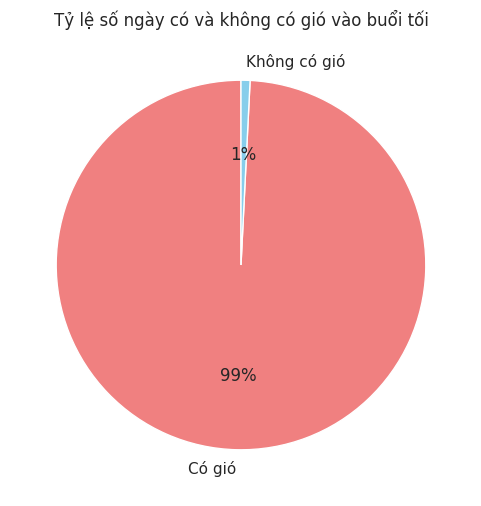

In [ ]:
per_wind1 = windspeed3pm.shape[0]/df.shape[0]
per_non_wind1 = non_wind3pm.shape[0]/df.shape[0]
labels = ['Có gió', 'Không có gió']
sizes = [per_wind1, per_non_wind1]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ số ngày có và không có gió vào buổi tối')
plt.show()

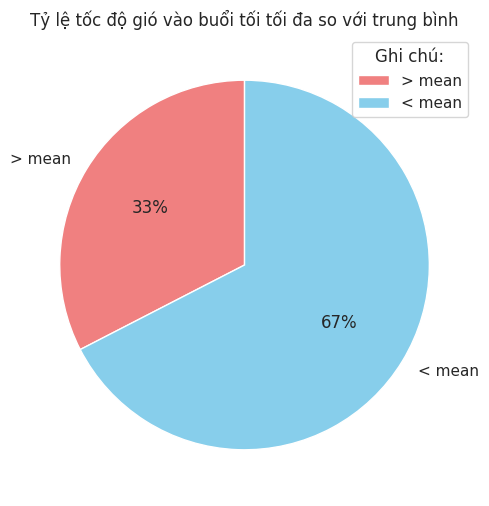

In [ ]:
per_low_mean3 = wind3pmlowmean.shape[0]/windspeed3pm.shape[0]
per_up_mean3 = wind3pmupmean.shape[0]/windspeed3pm.shape[0]
labels = ['> mean', '< mean']
sizes = [per_up_mean3, per_low_mean3]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('Tỷ lệ tốc độ gió vào buổi tối tối đa so với trung bình')
plt.legend(title = 'Ghi chú:', loc = 1)
plt.show()

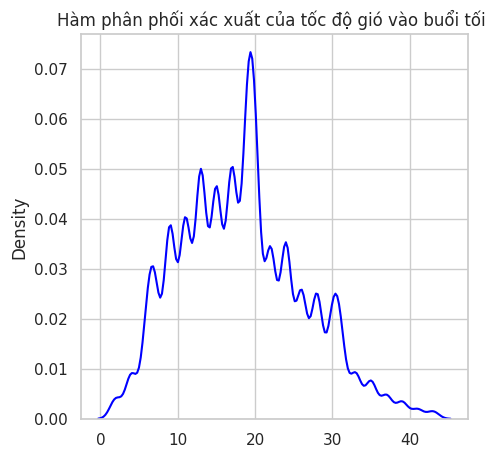

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(5, 5))
sns.distplot(windspeed3pm, hist = False, color = 'blue')

# Thêm nhãn và tên 2 trục
plt.xlabel('')
plt.ylabel('Density')
plt.title('Hàm phân phối xác xuất của tốc độ gió vào buổi tối ')
plt.show()